$\textbf{Введение}$ 

В современном мире объем текстовой информации растет с неимоверной скоростью, и умение эффективно обрабатывать и анализировать текстовые данные становится ключевым навыком в различных областях, от науки до бизнеса. Классификация текстов — это одна из важнейших задач в области обработки естественного языка, которая включает в себя автоматическую категоризацию текстов на основе их содержимого. Одним из интересных направлений этой задачи является определение авторства текста, что позволяет не только различать произведения разных авторов, но и выявлять их уникальные стилистические особенности. 

Цель: обучить модель различать тексты двух авторов. 

Задачи: 
1) Выбрать двух авторов; 
2) Подготовить обучающую выборку; 
3) Написать функцию, обрабатывающую тексты; 
4) Научить модель верно классифицировать отрывки произведений авторов; 
5) Протестировать полученную модель; 
6) Сделать выводы из проделанной работы. 


$\textbf{Подготовка данных}$

Первым делом необходимо определиться, тексты каких двух авторов мы будем различать. Пользуясь собственным читальским опытом, были выбраны следующие писатели: Лев Николаевич Толстой и Михаил Александрович Шолохов. Такой выбор сделан не зря, он обусловлен следующими причинами:
1) Два данных автора жили в разное время (Лев Николаевич Толстой жил в 19 веке, а Михаил Александрович Шолохов - в 20). Как известно, русский язык всегда изменятеся и всячески прогрессирует. Такие преобразования, в свою очередь, сильно влияют на стилистику текстов, написанных в разное время, синтаксические конструкции, лексические единицы и многие другие аспекты языка.
2) В произведениях Толстого часто встречаются длинные, сложносочиненные предложения с множеством вводных конструкций и уточнений, тогда как 
стиль Шолохова более прямолинеен и лаконичен, что его делает предложения короче и проще. Таким образом, можно предположить, что средняя частота слов в предложении в произведениях Толстого больше, чем у Шолохова.
3) Толстой склонен к детальным описаниям окружающей среды, внутреннего мира персонажей и их чувств. Шолохов тоже использует описания, но чаще они служат для передачи конкретных событий или действий. Исходя из этого суждения, среднее количество слов в произведениях Льва Николаевича должно быть больше.

Таким образом, можно сделать вывод, что классифицировать тексты данных авторов будет возможно. Более того, в ходе выполнения работы мы сможем убедиться в предположениях, высказанных ранее.

Далее необходимо создать обучающую выборку. Выбор пал на произведения "Анна Каренина", "Детство", "Война и мир"(1 том) Льва Николаевича Толстого и "Тихий Дон", "Поднятая целина", "Судьба человека" Михаила Александровича Шолохова. Все тексты были скачаны с сайта (https://royallib.com) в формате doc. Данные произведения достаточно велики, поэтому каждое из них было разделено на части (https://products.aspose.app) (каждая часть - две страницы документа Word). Получившиеся отрывки - это и есть наша выборка, благодаря которой будет осуществляться обучение линейной модели.

Теперь напишем функцию, которая будет обрабатывать текст, а после возращать среднюю частоту символов и слов отрывка. Для простоты она названа f. Для обработки текста, изначально необходимо его считать. Для этого воспользуемся классом "Document" и его встроенными функциями из библиотеки docx (pip install python-docx - установка библиотеки). Каждый документ мы разбиваем на абзацы и считываем их в отдельную переменную par, отсекая заголовки и названия глав. Далее осуществляется обработка всевозможных символов (после всех преобразований в переменной par хранится строка, содержащая точки, пробелы и сами слова. Первые два разделяют предложения и слова соответственно). В последнем блоке вычисляется средняя частота слов и символов, а после они вовращаются как значение функции в виде массива из двух элементов. Делается это следующим образом: 
частота слов = количество слов / количество предложений; частота символов = количество символов / количество слов.

In [2]:
#функция f, обрабатывающаяя текст
#вход: название файла
#выход: массив, состоящий из частоты символов и слов

from docx import Document #установка: pip install python-docx
def f(n):

    #считывание абзацев текста + отсечение заголовков и названия глав
    doc = Document(f"{n}.docx")
    par=""
    for paragraph in doc.paragraphs:
        p=paragraph.text
        while p:
            if p[-1]==" ":
                p=p[:-1:]
            else:
                break
        if p!="":
            if p[-1] in '.!?"»:-)':
                par+=(p+" ")

    #обработка символов, препятствующих обработке текста
    par=par.replace("— ","").replace("-- ","").replace("- ","").replace("!",".").replace("?",".").replace("\xa0","").replace("..",".").replace("  "," ").replace("..",".").replace("  "," ")
    for i in ',;:()«»"':
        par=par.replace(i,"")

    #рассчет частоты символов и слов
    par=par[:-1:].lower()
    sentences=par.count(".")
    words=par.count(" ")+1
    symbols=len(par)-words-sentences+1
    main_w_se=words/sentences
    main_sy_w=symbols/words
    
    return [main_w_se, main_sy_w]

После написания функции и ее тестировании на некоторых элементах выборки, можно считать весь датасет и для удобства визуализировать его. Для этого воспользуемся библиотеками numpy (установка pip install numpy) и matplolib (установка pip install matplotlib). Создадим массивы data_x и data_y. В первый запишем частоту символов и слов, а во второй - номер класса (1 - Толстой, -1 - Шолохов) каждого элемента. Далее для визуализации создадим массивы data1 и data_1. В них запишем точки из data_x (классы 1 и -1 соответственно). После всех процедур с помощью функции scatter из matplotlib отобразим точки на плоскости, где ось абсцисс - частота символов, а ординат - частота слов. Элементы из data1 отметим красным цветом, а из data_1 - синим.

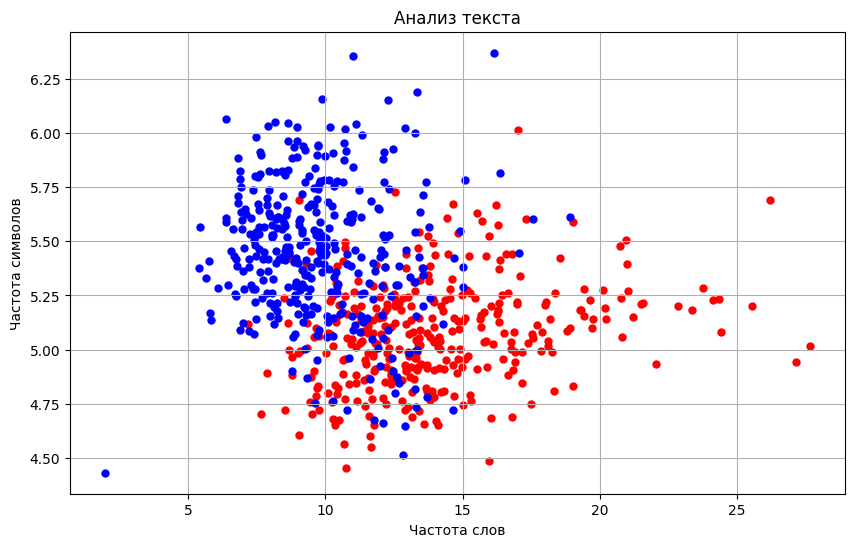

In [3]:
import numpy as np #установка: pip install numpy
import matplotlib.pyplot as plt #установка: pip install matplotlib

data_x=[]
data_y=[]

#считывание обучающей выборки
for i in range(1,67): #66
    data_x+=[f(f"1 ({i})")]
    data_y+=[1]
for i in range(1,37): #36
    data_x+=[f(f"2 ({i})")]
    data_y+=[1]
for i in range(1,249): #249
    data_x+=[f(f"Tolstoy_Anna_Karenina ({i})")]
    data_y+=[1]
for i in range(1,141): #190
    data_x+=[f(f"podnjataja_celina ({i})")]
    data_y+=[-1]
for i in range(1,203): #202
    data_x+=[f(f"tikhij_don_1-2 ({i})")]
    data_y+=[-1]
for i in range(1,9): #8
    data_x+=[f(f"Sholohov_Sudba_cheloveka ({i})")]
    data_y+=[-1]

np.random.seed(0)

data1=np.array(data_x)[np.array(data_y)>0]
data_1=np.array(data_x)[np.array(data_y)<0]
np.random.shuffle(data1)
np.random.shuffle(data_1)
data_x = np.vstack((data1, data_1))

#вывод полученных значений на двумерном графике (y - частота символов, x - частота слов) 
plt.figure(figsize=(10, 6))
plt.scatter(data1[:,0], data1[:,1], color='red', s=25)
plt.scatter(data_1[:,0], data_1[:,1], color='blue', s=25)

plt.title('Анализ текста')
plt.xlabel('Частота слов')
plt.ylabel('Частота символов')

plt.grid(True)

plt.show()

$\textbf{Обучение модели}$

Датасет подготовлен, поэтому можно приступить к обучению модели. Для этого поделим общую выборку data_x в соотношении 7:3. Большую часть элементов запишем в массив x_train, а их классы в y_train. На основе этих двух списков мы и будем обучать модель. Но сначала попробуем самостоятельно классифицировать отрывки текстов, проведя разделяющую прямую на глаз. Позже мы сравним точность обученной модели и человека.
Для вычисления уравнения прямой воспользуемся формулой $w_0 + w_1x_x + w_2x_y=0$, где $x_*$ - координата по одной из осей на плоскости, а $w_*$ - параметры, задающие прямую. Выберем 2 точки: (5, 4.6) и (16, 5.8). Решая систему уравнений 
$\left\{\begin{aligned}w_0+5w_1+4.6w_2&=0\\w_0+16w_1+5.8w_2&=0\end{aligned}\right.$ получим значения весов, которые запишем в массив my_vector. Позже мы проверим точность подобранных коэффициентов.

Приступим к обучению модели. Попробуем сделать это двумя разными способами:
1) Cоздадим функцию model, которая будет определять класс текста на основе передаваемых весов ($sign(w_0 + w_1x_x + w_2x_y)y$). Далее мы будем минимизировать $\sum_{i=0}^{n\_train}{[sign(w_0 + w_1x_{xi} + w_2x_{yi})y < 0]}$ (чем больше верно определенных классов, тем меньше сумма. [] - скобки Айверсона). Для этого будем корректировать веса с помощью циклов с шагом 0.1, взятых из my_vector, параллельно выписывая лучшие в массив vector2.
2)  Для обучения второй модели выберем квадратичную функцию потерь - $L_i = (1 - w^Tx_iy_i)^2$. Наша задача - свести ее сумму по всем элементам обучающей выборки к минимуму, а значит $Q(w)=\sum^n_{i=1}{(1 - w^Tx_iy_i)^2}$ должно быть минимальным(n - количество элементов). Для этого вычислим производную Q(w) и приравняем к 0: $-2\sum^{n}_{i=1}{(1-w^Tx_iy_i)x_i^Ty_i}=0$. Отсюда получаем формулу для вычисления коэффициентов: $w^T = \sum^{n}_{i=1}{x_i^Ty_i(\sum^{n}_{i=1}{x_ix_i^T})^{-1}}$. Применим ее и запишем полученные значения в массив vector.

Теперь необходимо визуализировать имеющиеся данные. Определим функцию table, которая будет отображать верно и ложно определенные классы. В строках запишем настоящих авторов произведений, а в столбцах - определенных моделью (создаем таблицы с помощью библиотеки pandas). Кроме того, функция будет возвращать процент верно определенных классов.

Визуализируем таблицы для vector, vector2, my_vector, обучающую выборку и три полученные прямые (черная - человек, серая - первая модель, зеленая - вторая модель) на плоскости с помощью библиотеки matplotlib.

         Толстой(mod)  Шолохов(mod)
Толстой           227            23
Шолохов            43           207 Точность человека: 87%

         Толстой(mod)  Шолохов(mod)
Толстой           231            19
Шолохов            47           203 Точность модели 1: 87%

         Толстой(mod)  Шолохов(mod)
Толстой           223            27
Шолохов            40           210 Точность модели 2: 87%



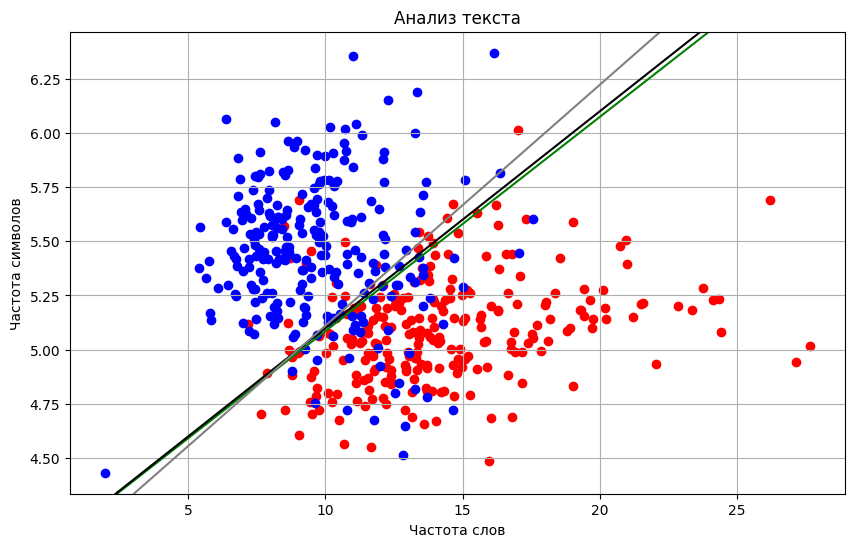

In [4]:
import pandas as pd #установка: pip install pandas

my_vector=np.array([4.1, 0.1, -1])
vector=np.array([0, 0, 0])

n_train = 500 // 2
x_train1 = np.array([(1, data_x[i][0], data_x[i][1]) for i in range(0, n_train)])
x_train2 = np.array([(1, data_x[i][0], data_x[i][1]) for i in range(350, 350+n_train)])
x_train = np.vstack((x_train1, x_train2))
y_train = np.array([1]*n_train+[-1]*n_train)

model = lambda w, x, y: np.sign(w[0]+w[1]*x[1]+w[2]*x[2])*y

'''                         first model                               '''
vector2 = np.zeros(3)
mincount = 1000

for vec1 in np.arange(3, 5, 0.1):
    for vec2 in np.arange(-1, 2, 0.1):
        for vec3 in np.arange(-3, 1, 0.1):
            count = 0
            for i in range(2*n_train):
                if model(np.array([vec1, vec2, vec3]), x_train[i], y_train[i]) < 0:
                    count += 1
            if count < mincount:
                vector2 = np.array([vec1, vec2, vec3])
                mincount = count

'''                         second model                              '''
sum1 = sum(x_train[i]*y_train[i] for i in range(0, n_train))+sum(x_train[i]*y_train[i] for i in range(n_train, 2*n_train))
sum2 = np.sum([np.outer(x, x) for x in x_train[0:n_train:]], axis=0)
sum2 += np.sum([np.outer(x, x) for x in x_train[n_train:2*n_train:]], axis=0)
vector = np.dot(sum1, np.linalg.inv(sum2))
'''                                                                   '''

def table(vector, razm, x_train, y_train):
    m1 = sum(model(vector, x_train[i], y_train[i]) for i in range(razm) if model(vector, x_train[i], y_train[i]) > 0)
    m2 = razm - m1
    m3 = sum(model(vector, x_train[i], y_train[i]) for i in range(razm, 2*razm) if model(vector, x_train[i], y_train[i]) < 0)*(-1)
    m4 = razm - m3
    dataM = [[m1, m2],
            [m3, m4]]
    dfM = pd.DataFrame(dataM, columns=['Толстой(mod)', 'Шолохов(mod)'], index=['Толстой', 'Шолохов'], dtype = "int16")
    return (round((m1+m4)/2/razm*100), dfM)

countpeople = table(my_vector, n_train, x_train, y_train)
print(countpeople[1], f"Точность человека: {countpeople[0]}%\n")

countmodel2 = table(vector2, n_train, x_train, y_train)
print(countmodel2[1], f"Точность модели 1: {countmodel2[0]}%\n")

countmodel = table(vector, n_train, x_train, y_train)
print(countmodel[1], f"Точность модели 2: {countmodel[0]}%\n")
    
plt.figure(figsize=(10,6))

plt.title('Анализ текста')
plt.xlabel('Частота слов')
plt.ylabel('Частота символов')

plt.scatter(data1[0:n_train, 0], data1[0:n_train, 1], c="r")
plt.scatter(data_1[0:n_train, 0], data_1[0:n_train, 1], c="b")
plt.axline((5,-5*vector[1]/vector[2]-vector[0]/vector[2]),(5.5,-5.5*(vector[1]/vector[2])-vector[0]/vector[2]), c="g")
plt.axline((5,-5*my_vector[1]/my_vector[2]-my_vector[0]/my_vector[2]),(5.5,-5.5*(my_vector[1]/my_vector[2])-my_vector[0]/my_vector[2]), c="black")
plt.axline((5,-5*vector2[1]/vector2[2]-vector2[0]/vector2[2]),(5.5,-5.5*(vector2[1]/vector2[2])-vector2[0]/vector2[2]), c="grey")

plt.grid() 
plt.show()

$\textbf{Тестирование модели}$

Теперь протестируем полученную модель. Запишем в переменные x_test и y_test оставшиеся элементы выборки. Для каждого вектора выведем таблицы и точность с помощью функции table. Получились следующие результаты: человеческая точность составила 84%, первая модель - 84%, вторая - 82%.

Визуализируем тестовую выборку на точечном графике и разделяющие прямые для наглядности.

         Толстой(mod)  Шолохов(mod)
Толстой            86            14
Шолохов            18            82 Точность человека: 84%

         Толстой(mod)  Шолохов(mod)
Толстой            87            13
Шолохов            19            81 Точность модели 1: 84%

         Толстой(mod)  Шолохов(mod)
Толстой            83            17
Шолохов            18            82 Точность модели 2: 82%



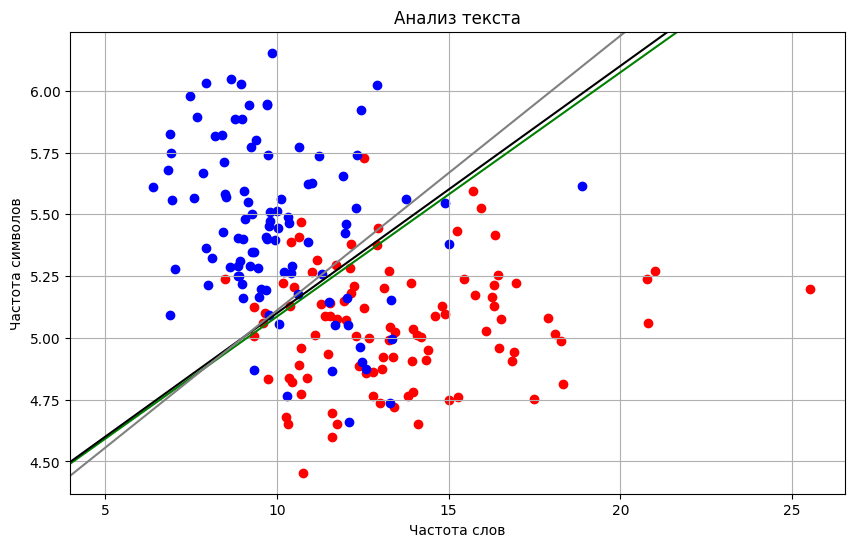

In [5]:
x_test1 = np.array([(1, data_x[i][0], data_x[i][1]) for i in range(n_train, 350)])
x_test2 = np.array([(1, data_x[i][0], data_x[i][1]) for i in range(350+n_train, 700)])
x_test = np.vstack((x_test1, x_test2))
y_test = np.array([1]*(350-n_train)+[-1]*(350-n_train)) 
n_test = 350 - n_train

countpeople = table(my_vector, n_test, x_test, y_test)
print(countpeople[1], f"Точность человека: {countpeople[0]}%\n")

countmodel2 = table(vector2, n_test, x_test, y_test)
print(countmodel2[1], f"Точность модели 1: {countmodel2[0]}%\n")

countmodel = table(vector, n_test, x_test, y_test)
print(countmodel[1], f"Точность модели 2: {countmodel[0]}%\n")

#построение графика с разделяющей прямой
plt.figure(figsize=(10, 6))
plt.scatter(data1[n_train:350, 0], data1[n_train:350, 1], c="r")
plt.scatter(data_1[n_train:350, 0], data_1[n_train:350, 1], c="b")
plt.axline((5,-5*vector[1]/vector[2]-vector[0]/vector[2]),(5.5,-5.5*(vector[1]/vector[2])-vector[0]/vector[2]), c="g")
plt.axline((5,-5*my_vector[1]/my_vector[2]-my_vector[0]/my_vector[2]),(5.5,-5.5*(my_vector[1]/my_vector[2])-my_vector[0]/my_vector[2]), c="black")
plt.axline((5,-5*vector2[1]/vector2[2]-vector2[0]/vector2[2]),(5.5,-5.5*(vector2[1]/vector2[2])-vector2[0]/vector2[2]), c="grey")

plt.title('Анализ текста')
plt.xlabel('Частота слов')
plt.ylabel('Частота символов')

plt.grid(True)

plt.show()

$\textbf{Заключение}$

В ходе работы мы обучили линейную модель различать произведения Льва Николаевича Толстого и Михаила Александровича Шолохова; кроме того, сделали это разными способами. В итоге они смогли верно распознать 84% и 82% отрывков соответственно. Это неплохой результат, но здесь стоит сказать, что классификация текстов достаточно сложный процесс. Недостаток данных моделей - маленькое количество параметров, на основе которых определяется автор произведения. Частоты символов и слов попросту недостаточно, чтобы качественно обрабатывать тексты. Об этом говорит сравнение точности модели и человека. Даже проведенная на глаз прямая может классифицировать отрывки с такой же точностью. Именно поэтому добавление новых параметров является перспективой развития для данной модели.

Также можно сделать некоторые выводы по точечному графику. Предположение, высказанное ранее, подтвердилось: в произведениях Толстого частота слов выше, чем у Шолохова. Кроме того, можно сказать, что Михаил Александрович употребляет наиболее длинные слова, чем Лев Николаевич. Именно у Шолохова частота символов выше. Эти факты в дальнейшем могут сильно облегчить задачу классификации, при рассмотрении большего количества параметров.

$\textbf{Литература}$
1) Документация matplolib: https://matplotlib.org/stable/api/index.html
2) Документация numpy: https://pythonist.ru/python-numpy-tutorial/
3) Документация pandas https://pandas.pydata.org/docs/
4) Курс по машинному обучению на Stepik https://stepik.org/course/209247/syllabus